<a href="https://colab.research.google.com/github/aayushmanace/Assignment/blob/main/DataAnalytics_IBARG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Visualization

The Gaia Telescope, since its launch has produced precise measurements about a billion stars and other source in our milky way and outside. This has lead to the creation of one of the most comprehensive and dynamic 3D maps of the Milky way till date. 

Here the dataset is contained in a `CSV` file named `SphereData.csv`. It contains all the parameters of the stars in the central region of the milky way around our supermassive black hole. Sagittarius A*.

You are supposed to read this data into a workable dataset using any Data base management library of your choice such as `pandas`, `numpy` etc, and create visually revealing plots and diagrams which would help us know something about the stars.

###  Tasks

- Create RA and DEC distribution of the data.
- Create a distance distribution and comment whether these stars "actually" lie around the galactic center. Discard any stars which do not seem to fit the norm. 
- Make Density scatter plots of the Proper motion in RA and DEC

### Other 

There are several parameters provided for each star in the dataset. So if you wish to make plots between some other values such as "Radial velocity" versus "distance" or "Magnitude" v/s "Position" etc, you are free to do so. Make as many plots as you find interesting and write a few lines about what the plot "demonstrates" or what science is contained in those plots.

In [1]:
!pip install astroquery #If your astroquery is already installed please comment this cell


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.1 MB/s eta 0:00:00


In [2]:
######################################################################################
# -- THIS IS THE DATA QUERY WHICH WAS SENT TO GAIA SERVER TO ACQUIRE THE SPHERE DATA. CSV
######################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math
import pandas as pd



In [3]:
#Coordinates of the Galactic Center
c = SkyCoord('17h45m40.04s', '-29d00m28.1s', frame='icrs')

#RA and DECof the Galactic Center
c_ra = 266.41683333
c_dec = -29.00780556

#Radius of Selection in Parsecs
r_s = 300
width = np.degrees(np.arctan(r_s / 8000))
print('The required width of window is: ', round(2 * width, 3), "degrees")

a1 = round(c_ra + width,3)
a2 = round(c_ra - width,3)
b1 = round(c_dec + width,3)
b2 = round(c_dec - width,3)
print(f'\nThe required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

c1 = round(1000/(8000+r_s),4)
c2 = round(1000/(8000-r_s),4)
print(f'\nThe required parallax window is: {c1} and {c2}')

query = f'''select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax,g.parallax_over_error,g.bp_rp,
g.pm,g.pmra,g.pmra_error,g.pmdec,g.pmdec_error,g.phot_g_mean_mag,g.phot_bp_mean_mag,g.phot_rp_mean_mag,g.radial_velocity,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf + h.classprob_dsc_combmod_binarystar as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between {a2} and {a1} and
g.dec between {b2} and {b1} and
g.parallax between {c1} and {c2}
order by g.phot_g_mean_mag desc, comb desc'''


job = Gaia.launch_job_async(query)
rep = job.get_results()

print('\nTotal number of stars queried: ',len(rep))

The required width of window is:  4.295 degrees

The required RA values are: 264.269 and 268.564
The required DEC values are: -31.155 and -26.86

The required parallax window is: 0.1205 and 0.1299


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried:  29551


Note that if any module in the above code is not available, it can be installed with a simple


- pip install <module name\>\
or
- conda install <module name\>

In [4]:
# Import all the required modules and libraries here
import astropy.coordinates as coord
import astropy.wcs as wcs
import astropy.units as u
import seaborn as sns
import astropy.io.fits as fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Set plotting defaults
matplotlib.rcParams['figure.figsize'] = [15, 5]
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.aspect'] = 'equal'
matplotlib.rcParams['image.cmap'] = 'inferno'
matplotlib.rcParams['image.interpolation'] = 'none'
%matplotlib inline

In [6]:
# Import the Sphere.csv dataset here
from google.colab import drive
import os
drive.mount('/content/drive')
path = '/content/drive/MyDrive/SphereData.csv'
r = pd.read_csv(path)


Mounted at /content/drive


In [7]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29551 entries, 0 to 29550
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29551 non-null  int64  
 1   source_id            29551 non-null  int64  
 2   ra                   29551 non-null  float64
 3   ra_error             29551 non-null  float64
 4   dec                  29551 non-null  float64
 5   dec_error            29551 non-null  float64
 6   parallax             29551 non-null  float64
 7   parallax_over_error  29551 non-null  float64
 8   bp_rp                28008 non-null  float64
 9   pm                   29551 non-null  float64
 10  pmra                 29551 non-null  float64
 11  pmra_error           29551 non-null  float64
 12  pmdec                29551 non-null  float64
 13  pmdec_error          29551 non-null  float64
 14  phot_g_mean_mag      29123 non-null  float64
 15  phot_bp_mean_mag     28021 non-null 

In [8]:
rep.info()

<Table length=29551>
        name         dtype    unit                              description                             n_bad
------------------- ------- -------- ------------------------------------------------------------------ -----
          source_id   int64          Unique source identifier (unique within a particular Data Release)     0
                 ra float64      deg                                                    Right ascension     0
           ra_error float32      mas                                  Standard error of right ascension     0
                dec float64      deg                                                        Declination     0
          dec_error float32      mas                                      Standard error of declination     0
           parallax float64      mas                                                           Parallax     0
parallax_over_error float32                                      Parallax divided by its standard e

### RA v/s DEC distribution

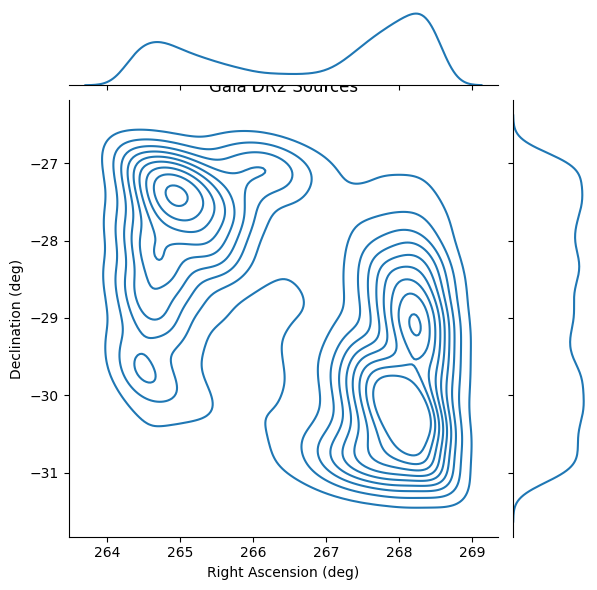

In [16]:
sns.jointplot(x=r['ra'], y=r['dec'], kind = "kde")

# Add labels and title to the plot
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Gaia DR2 Sources')
plt.show()

<ipython-input-17-ab24dccf7da0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r["ra"])


<Axes: xlabel='ra', ylabel='Density'>

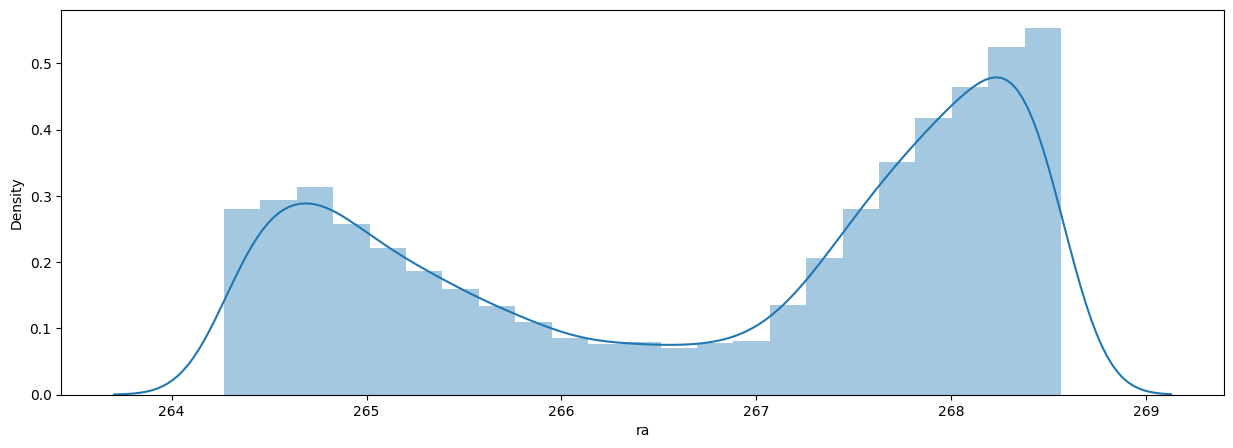

In [17]:
sns.distplot(r["ra"])

<ipython-input-18-3ec8f4f98f86>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r["dec"])


<Axes: xlabel='dec', ylabel='Density'>

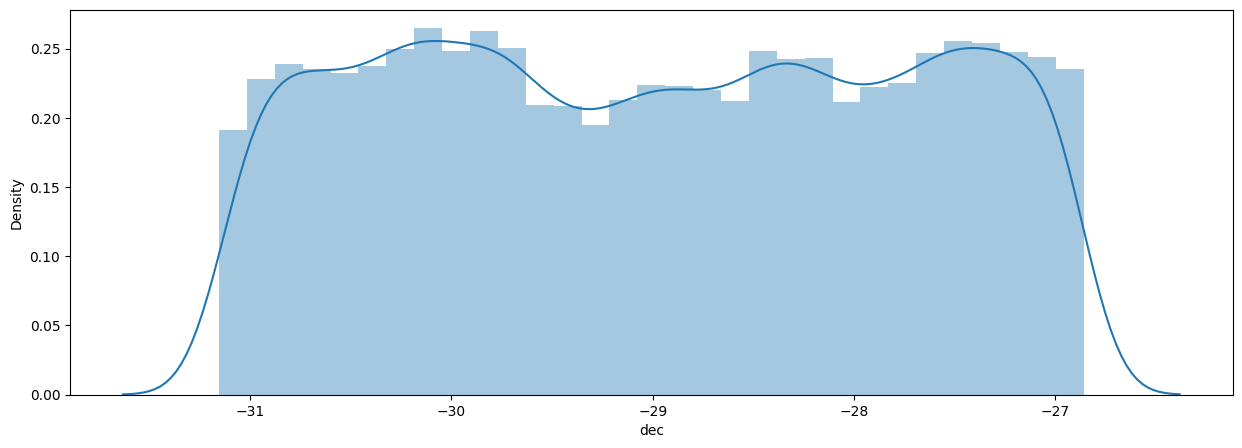

In [18]:
sns.distplot(r["dec"])

### Distance Distribution

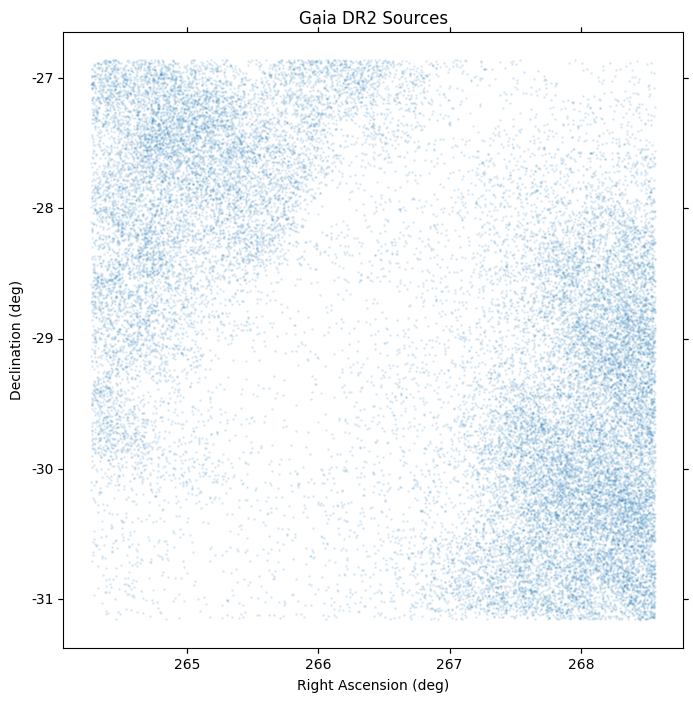

In [19]:
# Define the coordinates of the sources
coords = SkyCoord(ra=rep['ra'], dec=rep['dec'])
w = wcs.WCS(naxis=2)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': w})

# Plot the sources
ax.scatter(coords.ra.deg, coords.dec.deg, alpha=0.1, s=1, transform=ax.get_transform('world'))

# Add labels and title to the plot
ax.set_xlabel('Right Ascension (deg)')
ax.set_ylabel('Declination (deg)')
ax.set_title('Gaia DR2 Sources')

# Show the plot
plt.show()



** Enter your comments about the plot here **

** Are all the stars really around the galactic center? How do you know? **

### Density Scatter Plot

In [20]:

result = r
# Calculate distance in parsecs
dist_pc = 1/result['parallax']
dist_pc_err = result['parallax_error']/result['parallax'] * dist_pc

# Discard outliers based on distance error and magnitude
good_idx = (dist_pc_err < 0.1) & (result['phot_g_mean_mag'] < 18)
dist_pc = dist_pc[good_idx]
dist_pc_err = dist_pc_err[good_idx]

# Plot distance distribution
fig, ax = plt.subplots()
ax.hist(dist_pc, bins=np.logspace(0, 4, 50))
ax.set_xscale('log')
ax.set_xlabel('Distance (pc)')
ax.set_ylabel('Number of Stars')
plt.show()






KeyError: ignored

### #Make New cell for each new graph and add a subsequent Markdown cell for your comment

- Please label your graphs properly
- Make sure to add legends to the plots
- Add brief comments about what the graph speaks after each cell.


**Note: If you are not adding any new graph, please delete this cell and move to the Next section**

# 2. Data Cleaning and Interpretation

The pulsars are extremely faint radio source, hence on earth, where there is so much of radio noise coming off from TV broadcasts etc. it becomes tough to detect them in a single observation.

Scientists use a method called stacking which helps them detect these pulsars given enough observations about them. Each FITS file consists of a pulsar reading, which is invisible to the human eye when plotted. But if you stack all the images and take the mean of each pixel to create a new one, the noise being a random gaussian distribution cancels out and the Radio pulsar stars to become visible.


- Create a Mean stack of all the FITS images and plot the final results. Also mention the pixel number of the Pulsar detection and also make a circle around it in the image while plotting (This is bit tricky part hence leave if no feasible).

- Create a Median stack and repeat the same process. 

- Comment your observations about what stacking is better, Median or Mean. 

- Also, if I increase the dataset images to about a million (real life scenario), do you think any problem would occur? Suggest a few ways to overcome such problems if any.


The data for this exercise is provided in the folder named `Pulsar Data`

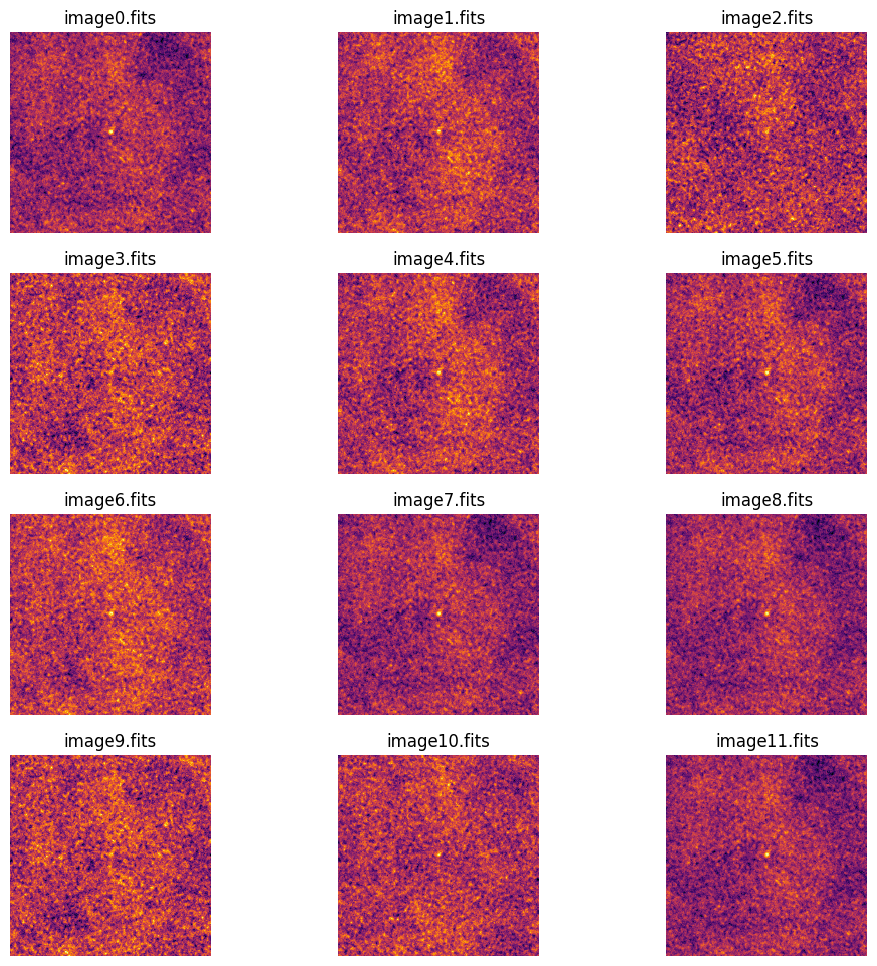

In [21]:
folder_path = '/content/drive/MyDrive/Pulsar Data'
dir =  os.listdir(folder_path)
fits_images = []
for i in range(len(dir)):
    fits_images.append(fits.open("{}".format(folder_path+'/'+dir[i])))

img = [image[0].data for image in fits_images]

# Create a figure with 4 rows and 3 columns to display the 12 images
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Iterate over all the subplots and show the images
for i, ax in enumerate(axes.flat):
    ax.imshow(img[i])
    ax.set_title(dir[i])
    ax.axis("off")

# Show the figure
plt.show()

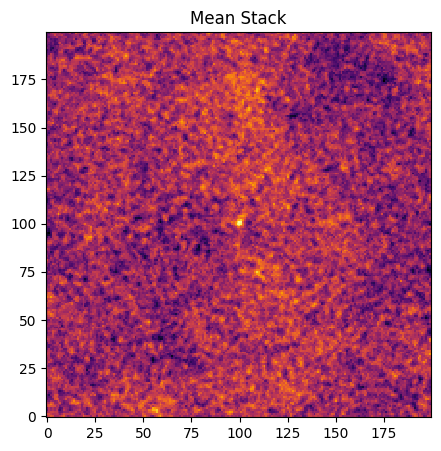

In [22]:
mean_stack = np.zeros(fits_images[0][0].data.shape)
# Calculate the mean values of all pixels at each position in all the images
for image in fits_images:
    mean_stack += image[0].data
mean_stack /= len(fits_images)

# Plot the Mean stack
plt.imshow(mean_stack)
plt.title('Mean Stack')
plt.show()

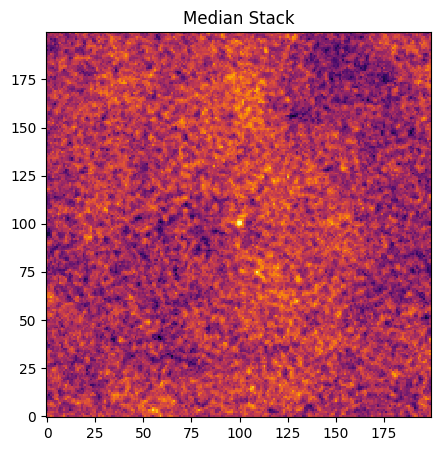

In [23]:
# Enter you code for Median Stack here
#median_stack = np.zeros(fits_images[0][0].data.shape)

#Create a Median stack
median_stack = np.median([img[0].data for img in fits_images], axis=0)

# Plot the Median stack
plt.imshow(median_stack)
plt.title('Median Stack')
plt.show()

## Observations:

In general, median stacking is better than mean stacking for pulsar detection, because it is less sensitive to outliers (which may be caused by radio interference or other noise sources). However, the choice of stacking method depends on the specific characteristics of the data and the scientific goals of the analysis.

For a dataset with millions of images, one potential problem is memory limitations. To overcome this, we can use an incremental stacking approach, where we stack subsets of the data at a time and then combine the results. We can also use parallel computing to speed up the process. Another issue is that the data may be stored on multiple disks or servers, which can increase the time and complexity of accessing the data. In this case, we may need to use distributed computing or cloud storage solutions.






# 3. Data Interpretation

I hope you saw the code using which the Gaia data for the first task was downloaded. 

In this task you are supposed to download and create a dataset, from any telescope such as Gaia, Hubble, JWST (a bit tough), ALMA etc. You can even change the query code given above and select a different region of the sky. 

Create the dataset and make a visual interpretation of the data. Create at least 5 plots using the data set and describe the Physics they demonstrate as much as you can. 

This is an open end question hence there are no restrictions, although if you need any suggestions or ideas to begin with, I would highly reccommend to search GitHub/Kaggle as they provide a lot of innovative ideas about computational astronomy projects. 

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1

import astropy.units as u
from astropy.coordinates import SkyCoord

In [25]:
ra0 = 130.025
de0 = 19.98333
w = 3
h = 2

# Define the region to query
coord = SkyCoord(ra=ra0, dec=de0, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(w, u.deg)
height = u.Quantity(h, u.deg)

# Run the actual query to the catalogue
%time r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 16.6 s, sys: 317 ms, total: 16.9 s
Wall time: 37.5 s


In [26]:
data = r.to_pandas()
data['distance'] = 1.0/data['parallax']
data

dist          solution_id                  DESIGNATION  \
0      0.009802  1635721458409799680  Gaia DR2 661322846442390784   
1      0.013414  1635721458409799680  Gaia DR2 661322953818940160   
2      0.016757  1635721458409799680  Gaia DR2 661322919458270080   
3      0.017763  1635721458409799680  Gaia DR2 661322129182111232   
4      0.018220  1635721458409799680  Gaia DR2 661322090528141568   
...         ...                  ...                          ...   
30325  1.714573  1635721458409799680  Gaia DR2 661860473268060032   
30326  1.716012  1635721458409799680  Gaia DR2 661047594874045696   
30327  1.717709  1635721458409799680  Gaia DR2 662738643758017536   
30328  1.724373  1635721458409799680  Gaia DR2 661047354355879296   
30329  1.727997  1635721458409799680  Gaia DR2 662738605101644928   

                source_id  random_index  ref_epoch          ra   ra_error  \
0      661322846442390784     390503307     2015.5  130.015005   0.248881   
1      661322953818940160     350513172     2015.5  130.016021   0.105317   
2      661322919458270080    1520423091     2015.5  130.008090  18.646404   
3      661322129182111232    1348785594     2015.5  130.039527   0.494142   
4      661322090528141568    1417274752     2015.5  130.021480   0.255773   
...                   ...           ...        ...         ...        ...   
30325  661860473268060032     703312001     2015.5  131.523122   0.696914   
30326  661047594874045696    1141285327     2015.5  131.516276   0.272562   
30327  662738643758017536     390421460     2015.5  128.528345   0.534061   
30328  661047354355879296     767876425     2015.5  131.515584   0.077613   
30329  662738605101644928     525203101     2015.5  128.527081   0.383531   

             dec  dec_error  ...  e_bp_min_rp_percentile_upper  flame_flags  \
0      19.980541   0.193851  ...                           NaN         <NA>   
1      19.993747   0.068837  ...                           NaN         <NA>   
2      19.988621  11.796212  ...                           NaN         <NA>   
3      19.971954   0.369152  ...                           NaN         <NA>   
4      19.965408   0.176424  ...                           NaN         <NA>   
...          ...        ...  ...                           ...          ...   
30325  20.968275   0.478415  ...                           NaN         <NA>   
30326  18.999212   0.154463  ...                           NaN         <NA>   
30327  19.003505   0.307096  ...                           NaN         <NA>   
30328  18.983878   0.047253  ...                           NaN       200111   
30329  18.987366   0.232295  ...                           NaN         <NA>   

       radius_val  radius_percentile_lower  radius_percentile_upper   lum_val  \
0             NaN                      NaN                      NaN       NaN   
1             NaN                      NaN                      NaN       NaN   
2             NaN                      NaN                      NaN       NaN   
3             NaN                      NaN                      NaN       NaN   
4             NaN                      NaN                      NaN       NaN   
...           ...                      ...                      ...       ...   
30325         NaN                      NaN                      NaN       NaN   
30326         NaN                      NaN                      NaN       NaN   
30327         NaN                      NaN                      NaN       NaN   
30328    0.636425                 0.488395                 0.677318  0.129163   
30329         NaN                      NaN                      NaN       NaN   

       lum_percentile_lower  lum_percentile_upper  \
0                       NaN                   NaN   
1                       NaN                   NaN   
2                       NaN                   NaN   
3                       NaN                   NaN   
4                       NaN                   NaN   
...              

In [27]:
# Count the number of entries
data.count()

dist                    30330
solution_id             30330
DESIGNATION             30330
source_id               30330
random_index            30330
                        ...  
lum_val                  4318
lum_percentile_lower     4318
lum_percentile_upper     4318
datalink_url            30330
distance                25337
Length: 97, dtype: int64

In [28]:
data.describe()

dist   solution_id     source_id  random_index  ref_epoch  \
count  30330.000000  3.033000e+04  3.033000e+04  3.033000e+04    30330.0   
mean       0.926044  1.635721e+18  6.625714e+17  8.481437e+08     2015.5   
std        0.364550  0.000000e+00  1.566766e+15  4.907570e+08        0.0   
min        0.009802  1.635721e+18  6.596981e+17  1.996900e+04     2015.5   
25%        0.659723  1.635721e+18  6.612667e+17  4.222359e+08     2015.5   
50%        0.947206  1.635721e+18  6.618324e+17  8.466956e+08     2015.5   
75%        1.212239  1.635721e+18  6.643895e+17  1.278397e+09     2015.5   
max        1.727997  1.635721e+18  6.648629e+17  1.692899e+09     2015.5   

                 ra      ra_error           dec     dec_error      parallax  \
count  30330.000000  30330.000000  30330.000000  30330.000000  25337.000000   
mean     130.015400      1.854095     19.976328      1.070778      1.022348   
std        0.864883      5.116695      0.574201      2.918166      1.569493   
min      128.525007      0.018194     18.983352      0.011679    -12.538883   
25%      129.266310      0.127751     19.484145      0.078967      0.271126   
50%      130.012563      0.398032     19.976029      0.243634      0.745938   
75%      130.762424      1.011944     20.469638      0.617917      1.485823   
max      131.524907     92.941017     20.983283     56.658432     23.376402   

       ...  e_bp_min_rp_percentile_lower  e_bp_min_rp_percentile_upper  \
count  ...                   5053.000000                   5053.000000   
mean   ...                      0.097709                      0.263006   
std    ...                      0.141129                      0.213469   
min    ...                      0.000000                      0.007100   
25%    ...                      0.007900                      0.107100   
50%    ...                      0.041700                      0.200700   
75%    ...                      0.125500                      0.351800   
max    ...                      1.238700                      1.553000   

       flame_flags   radius_val  radius_percentile_lower  \
count       4318.0  4318.000000              4318.000000   
mean      200111.0     1.397740                 1.281509   
std            0.0     3.233030                 2.986711   
min       200111.0     0.500969                 0.313949   
25%       200111.0     0.720208                 0.648146   
50%       200111.0     0.937876                 0.855817   
75%       200111.0     1.269365                 1.156431   
max       200111.0   150.389877               136.227798   

       radius_percentile_upper      lum_val  lum_percentile_lower  \
count              4318.000000  4318.000000           4318.000000   
mean                  1.488634     4.140486              3.617357   
std                   3.329456    44.876537             40.223827   
min                   0.513331     0.030905              0.030151   
25%                   0.763561     0.256345              0.214092   
50%                   1.002790     0.667259              0.584672   
75%                   1.379006     1.830126              1.586210   
max                 151.835205  2420.168213           2245.128906   

       lum_percentile_upper      distance  
count           4318.000000  25337.000000  
mean               4.663615      0.166190  
std               49.658024    126.621830  
min                0.031660 -13671.029870  
25%                0.296318      0.368741  
50%                0.758724      0.902737  
75%                2.058991      1.769543  
max             2595.207520   3075.737473  

[8 rows x 92 columns]

In [29]:
location_limits = data.agg({'ra' : ['mean', 'min', 'max'], 'dec' : ['mean', 'min', 'max']})
location_limits


ra        dec
mean  130.015400  19.976328
min   128.525007  18.983352
max   131.524907  20.983283

Sky distribution of the stars by flux

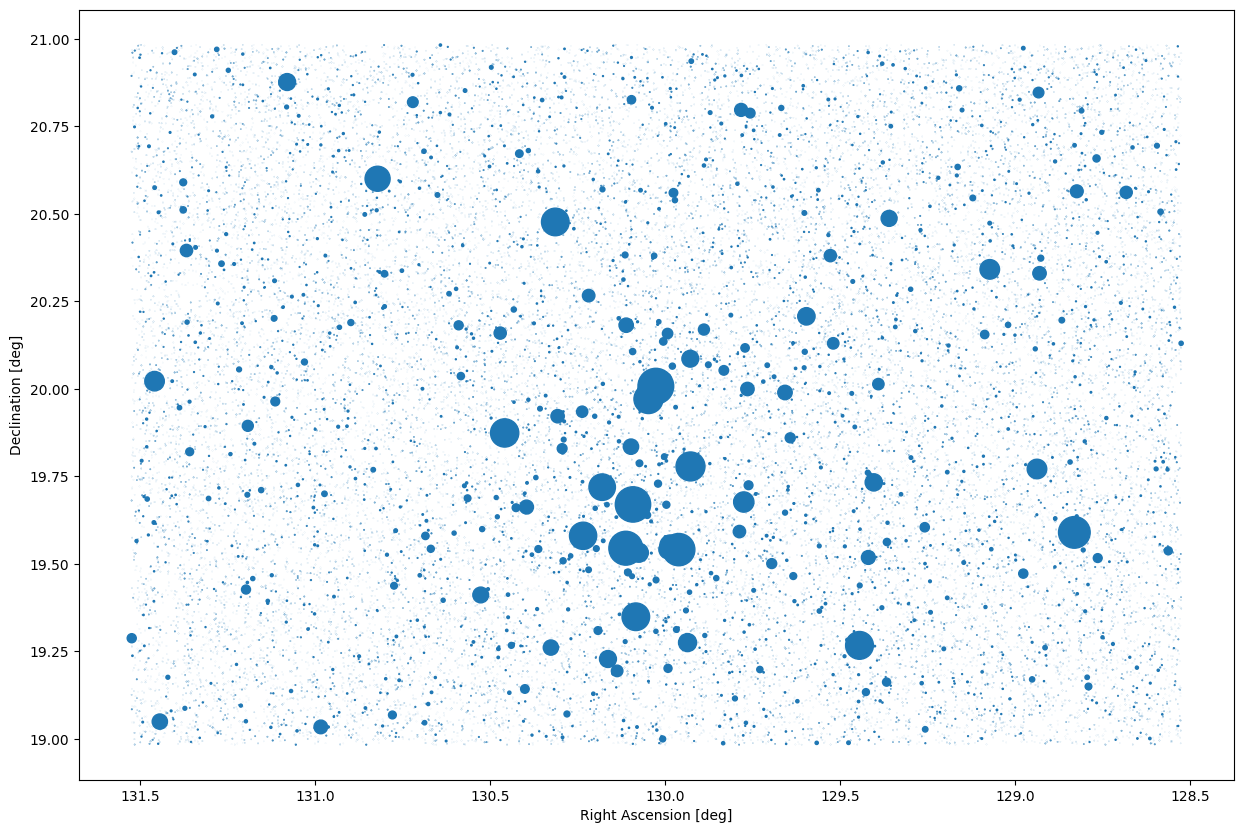

In [30]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.scatter(data['ra'], data['dec'], s=data['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

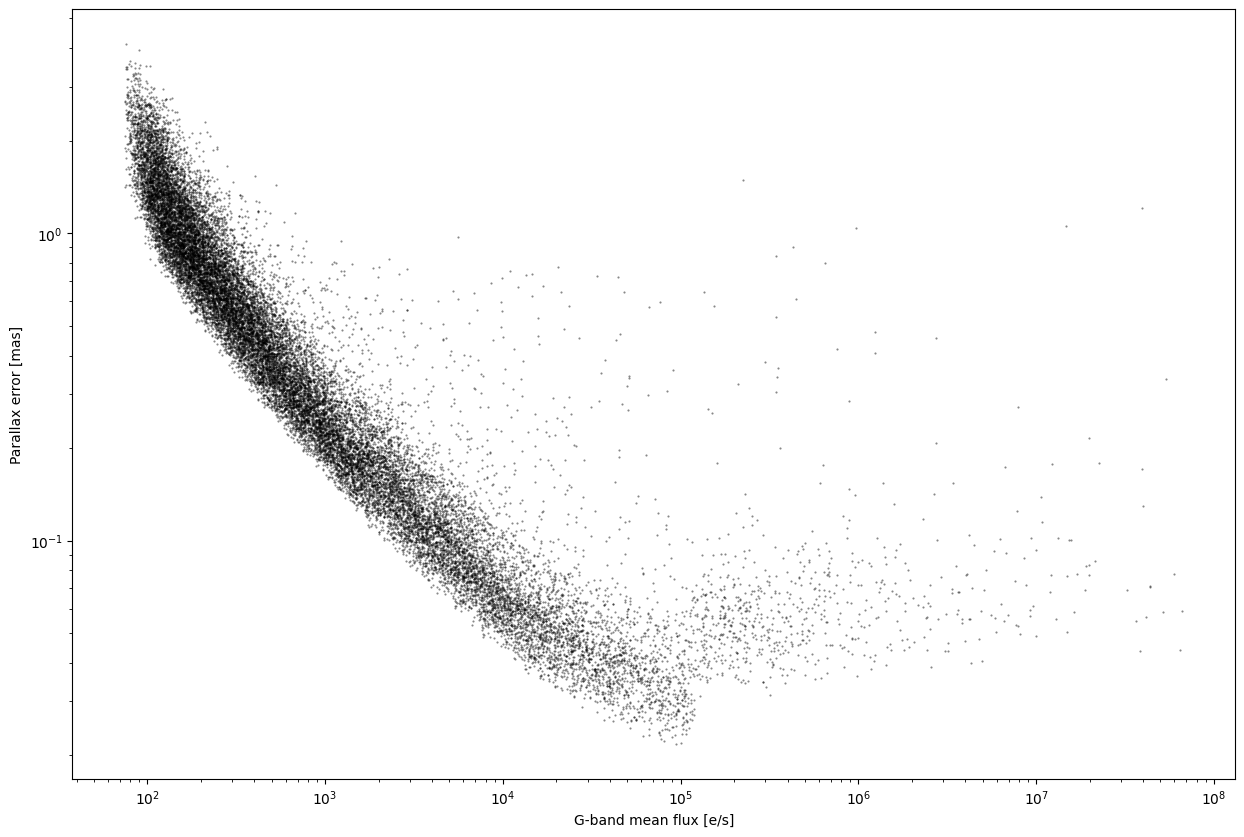

In [31]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))

ax.plot(data['phot_g_mean_flux'], data['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog()
ax.set_xlabel('G-band mean flux [e/s]')
ax.set_ylabel('Parallax error [mas]');

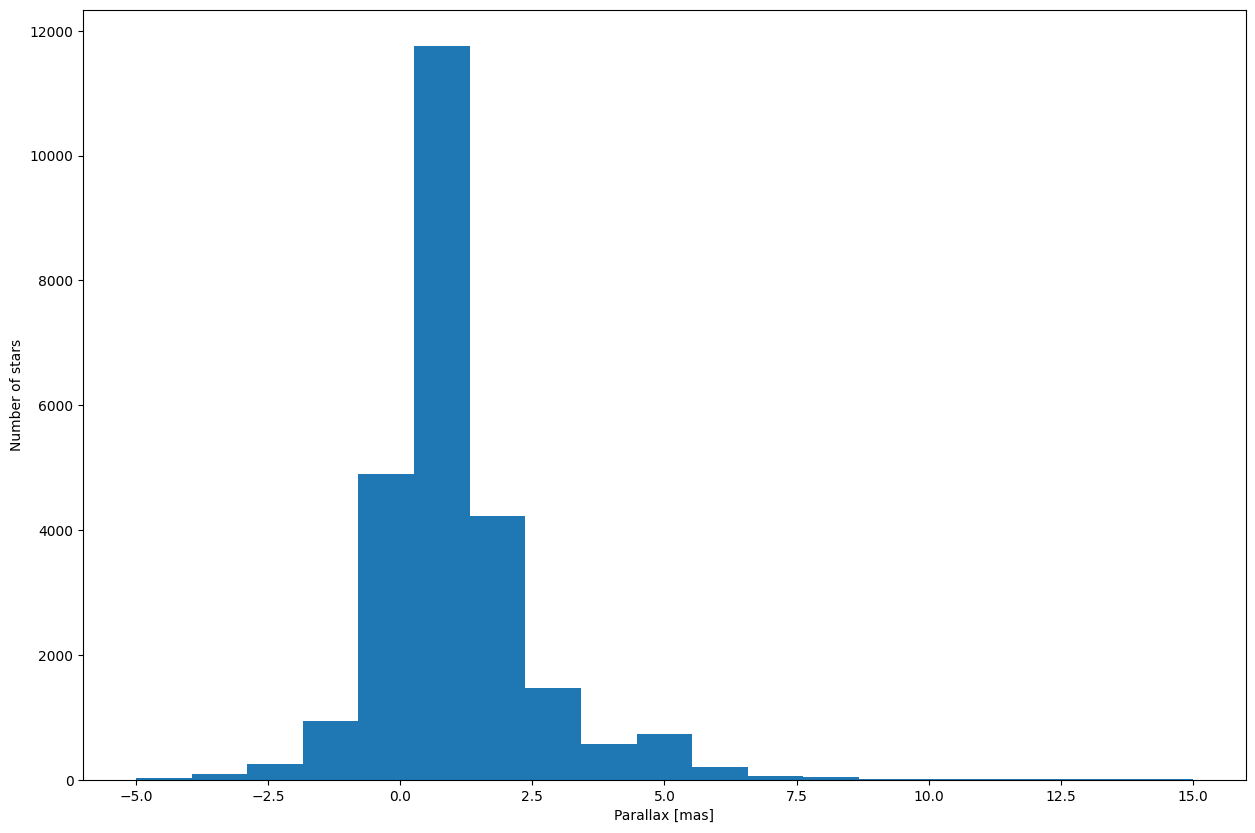

In [32]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.hist(data['parallax'], bins=np.linspace(-5, 15, 20));
ax.set_xlabel('Parallax [mas]')
ax.set_ylabel('Number of stars');

First of all we see that there are negative parallaxes, which doesn't have physical meaning, but are a consequence of errors in the parallax determination.

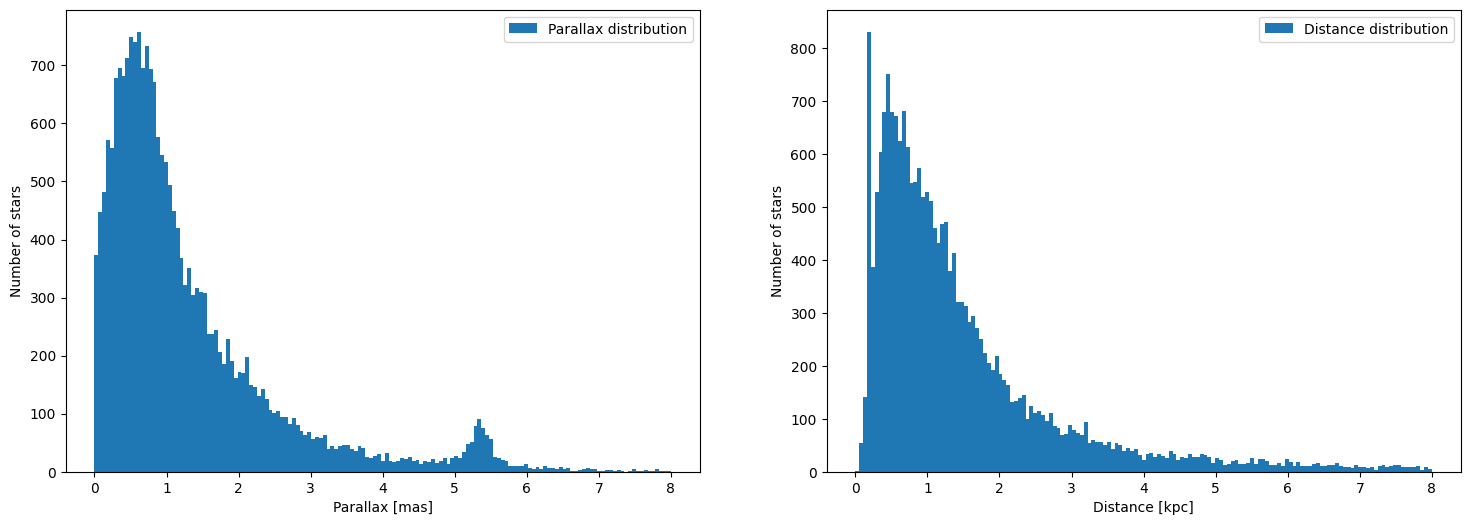

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
ax[0].hist(data['parallax'], bins=np.linspace(0, 8, 150), label='Parallax distribution')
ax[1].hist(data['distance'], bins=np.linspace(0, 8, 150), label='Distance distribution')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

We see a very interesting accummulation of stars at a parallax of approximately 5.2 mas. We can create a filter to select the start in that particular range. We will overplot the distribution of the whole sample and the one of the selected group.

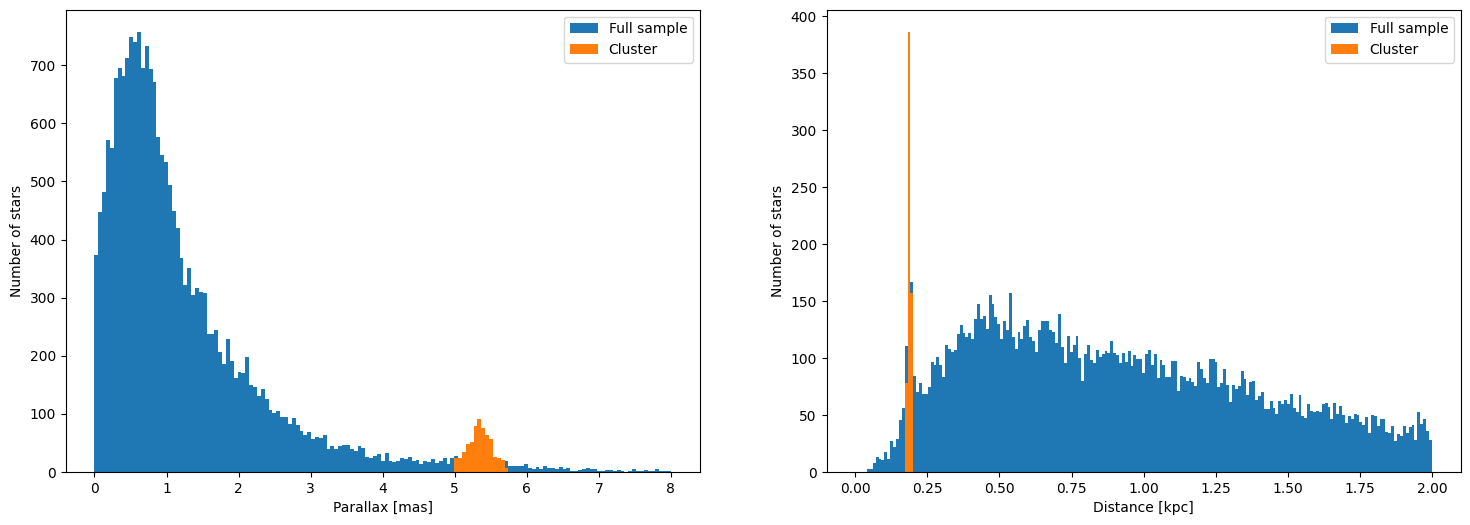

In [34]:
selection = (data['parallax'] > 5.0) & (data['parallax'] < 5.7)
cluster = data[selection]
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
ax[0].hist(data['parallax'], bins=np.linspace(0, 8, 150), label='Full sample')
ax[0].hist(cluster['parallax'], bins=np.linspace(0, 8, 150), label='Cluster')

ax[1].hist(data['distance'], bins=np.linspace(0, 2, 200), label='Full sample')
ax[1].hist(cluster['distance'], bins=np.linspace(0, 2, 200), label='Cluster')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();

We plot the distribution of start in the sky. First, all the stars in the sample are plotted in grey. The stars of the cluster and plotted in color, with the colorscale representing the distance from the Earth in pc.

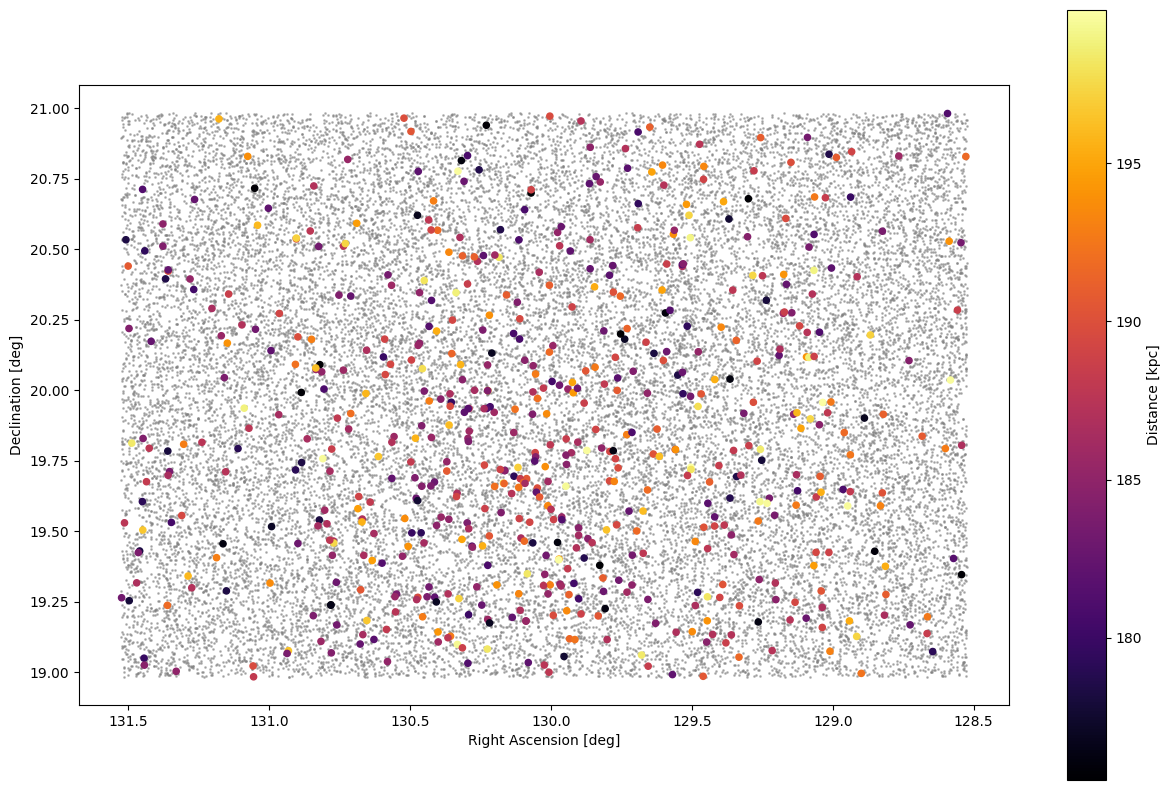

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.set_aspect('equal')
ax.scatter(data['ra'], data['dec'], c='gray', s=1, alpha=0.5);
l = ax.scatter(cluster['ra'], cluster['dec'], c=cluster['distance']*1000., s=20);

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

# Show the color bar
cb = fig.colorbar(l);
cb.set_label('Distance [kpc]')

There is no apparent pattern of the selected stars, and they don't seem to cluster in a particular region, although there seems to be an overdensity at the center, specially in Right Ascension.